In [15]:
import pandas as pd
import numpy as np
from pathlib import Path


In [16]:
valid_after = 1000
valid_iters = 1000

In [17]:
current_path = str(Path.cwd()).split("/")
dataset = current_path[-4]
domain_type = "-".join(current_path[-5].split("_")[:-1])
model = current_path[-2].split("_")[0]
info_str = f"Model: {model}, Domain-Type: {domain_type}, Dataset: {dataset}"


In [18]:
training_loss_acc = pd.read_csv("experiment_results_train.csv")
valid_loss_acc = pd.read_csv("experiment_results_validation.csv")[:-valid_iters]

In [19]:
training_loss_acc["running_loss_training"] = training_loss_acc["Loss"].rolling(100).mean()
training_loss_acc["running_acc_training"] = training_loss_acc["Accuracy"].rolling(100).mean()
training_loss_acc["iteration"] = training_loss_acc.index
training_loss_acc = training_loss_acc.rename(columns={"Accuracy": "raw_acc_training",
                                "Loss": "raw_loss_training"})#.drop(["Accuracy", "Loss"], axis=1)

training_loss_acc["epoch"] = np.ceil((training_loss_acc.index+0.000001) / valid_after).astype(int)
training_loss_acc

,raw_acc_training,raw_loss_training,running_loss_training,running_acc_training,iteration,epoch
0,0.2125,1.633448,NaN,NaN,0,1
1,0.3500,1.618590,NaN,NaN,1,1
2,0.2250,2.170938,NaN,NaN,2,1
3,0.2125,1.935992,NaN,NaN,3,1
4,0.3375,1.722779,NaN,NaN,4,1
...,...,...,...,...,...,...
9995,1.0000,0.004451,0.001946,1.0,9995,10
9996,1.0000,0.002164,0.001950,1.0,9996,10
9997,1.0000,0.006216,0.001981,1.0,9997,10
9998,1.0000,0.000481,0.001981,1.0,9998,10


In [20]:
valid_loss_acc["epoch"]  = np.ceil((valid_loss_acc.index+0.000001) / valid_iters).astype(int)

valid_per_epoch = valid_loss_acc.groupby("epoch", as_index=False).mean().rename(columns={"Accuracy": "running_acc_validation",
                                "Loss": "running_loss_validation"})

epochs_df = training_loss_acc.merge(valid_per_epoch, on="epoch").set_index("iteration")[1:]

valid_per_epoch


,epoch,running_acc_validation,running_loss_validation
0,1,0.290050,1.576742
1,2,0.281200,1.734066
2,3,0.259263,2.032579
3,4,0.236750,2.384331
4,5,0.236438,2.345718
5,6,0.235188,2.662265
6,7,0.242925,2.600570
7,8,0.239575,2.643353
8,9,0.241750,2.821575
9,10,0.235200,3.067584


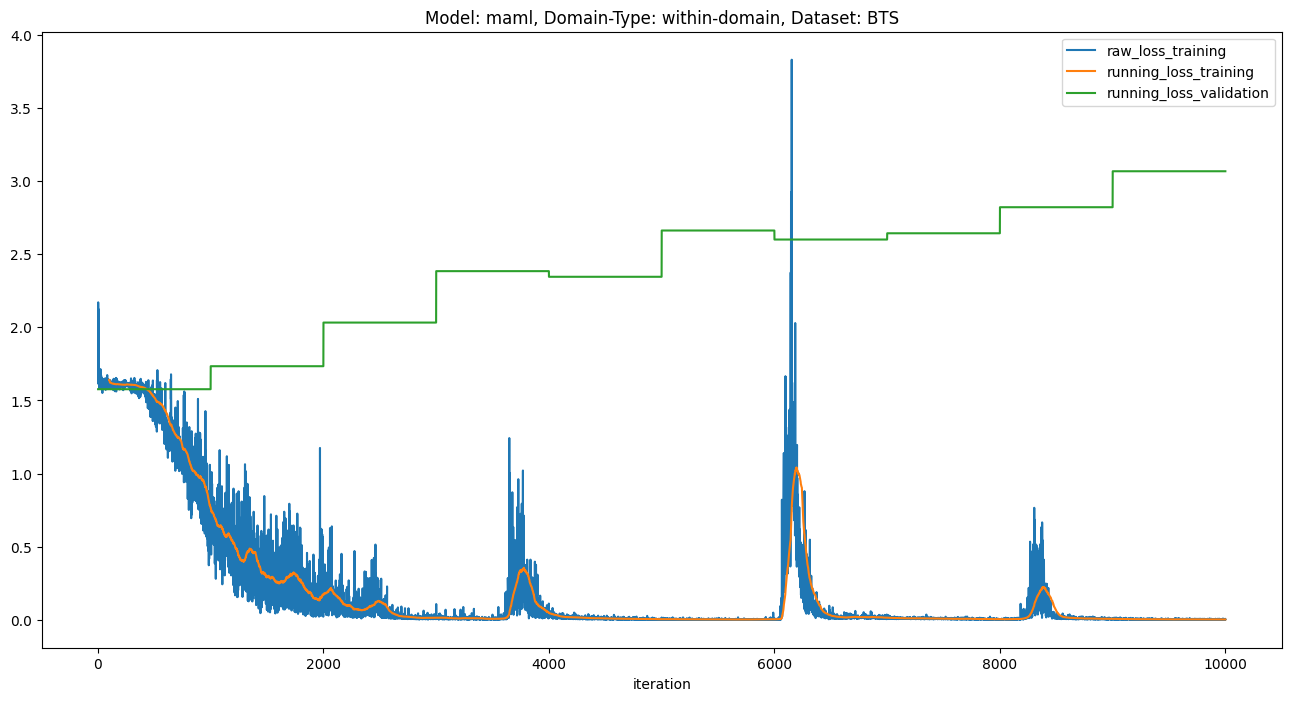

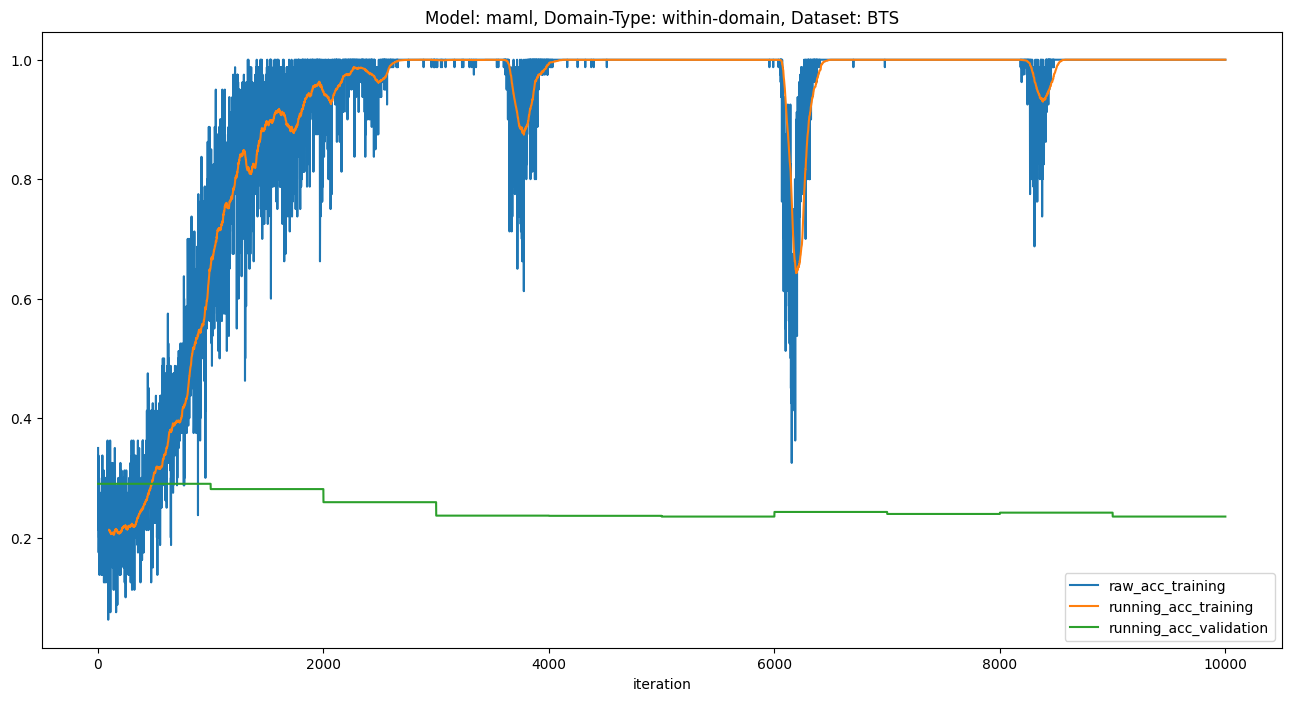

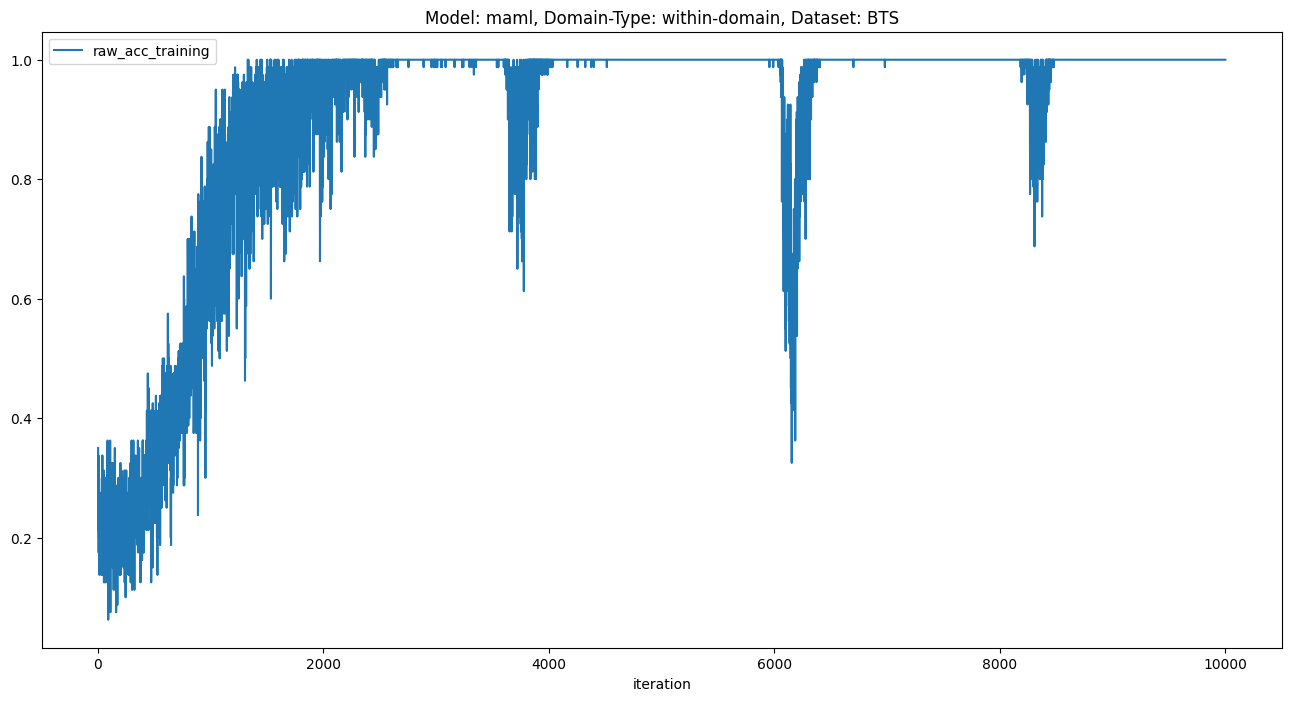

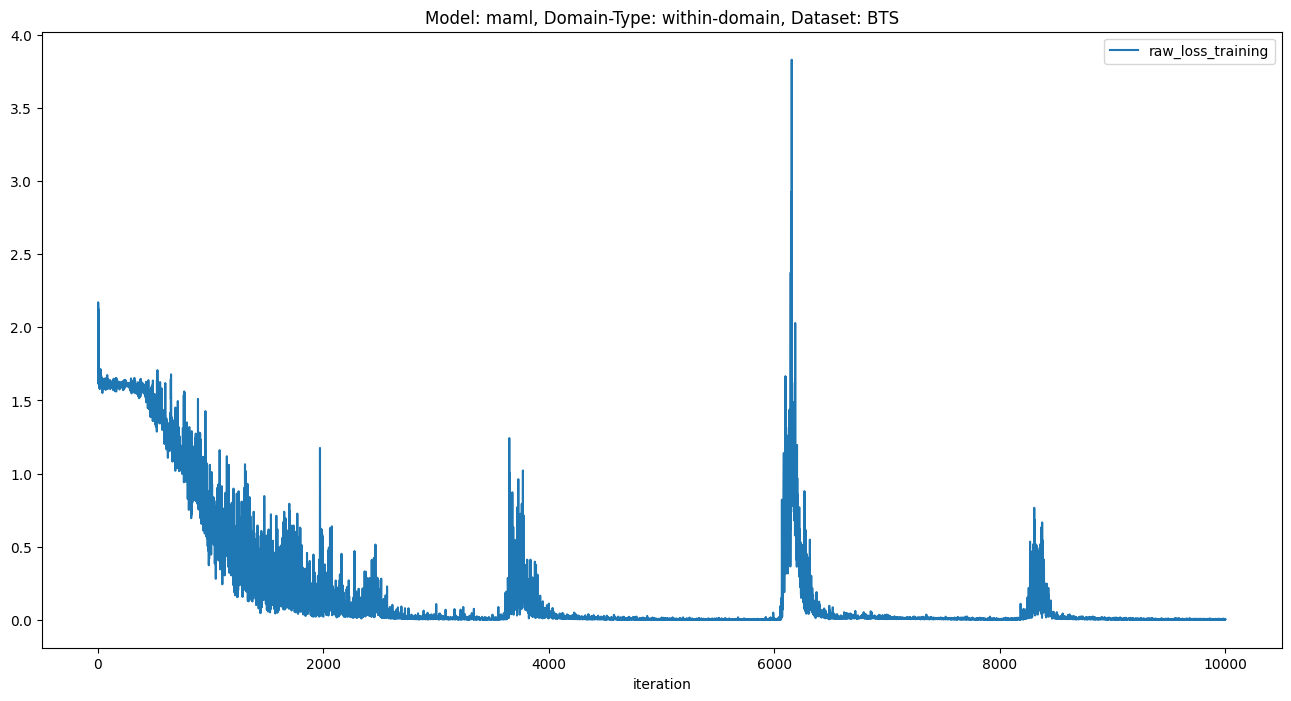

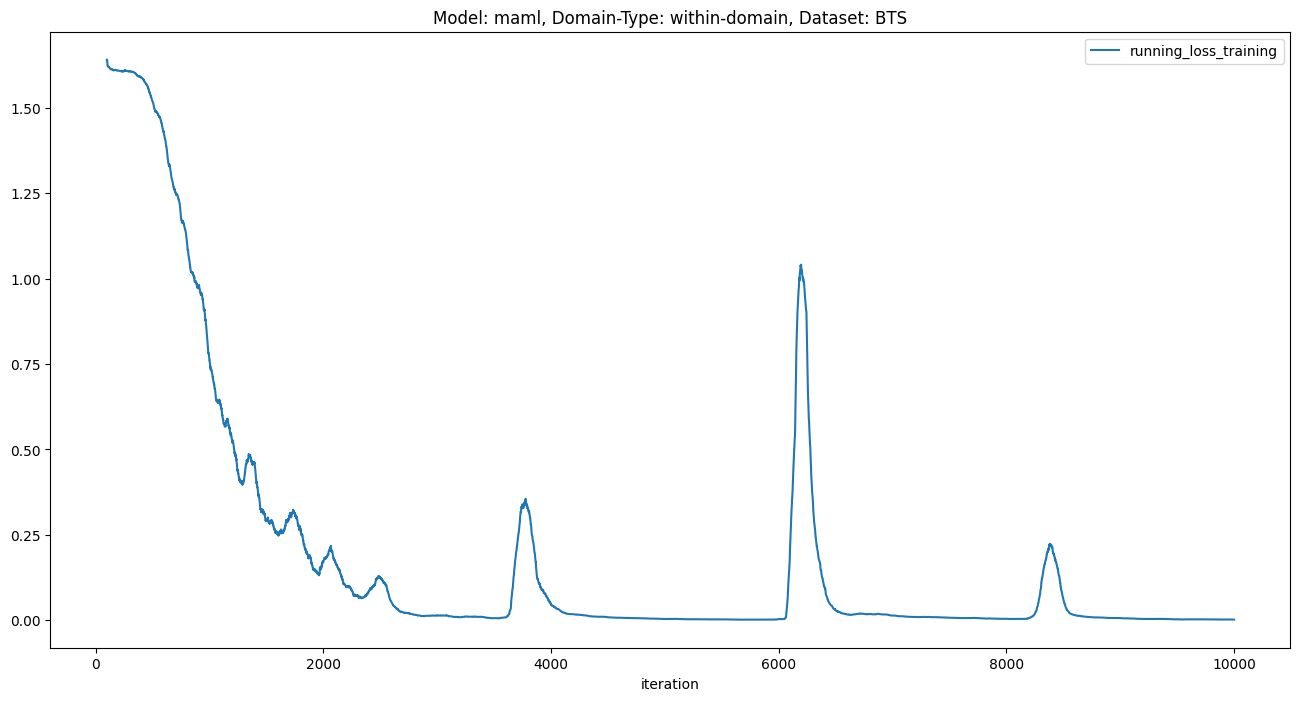

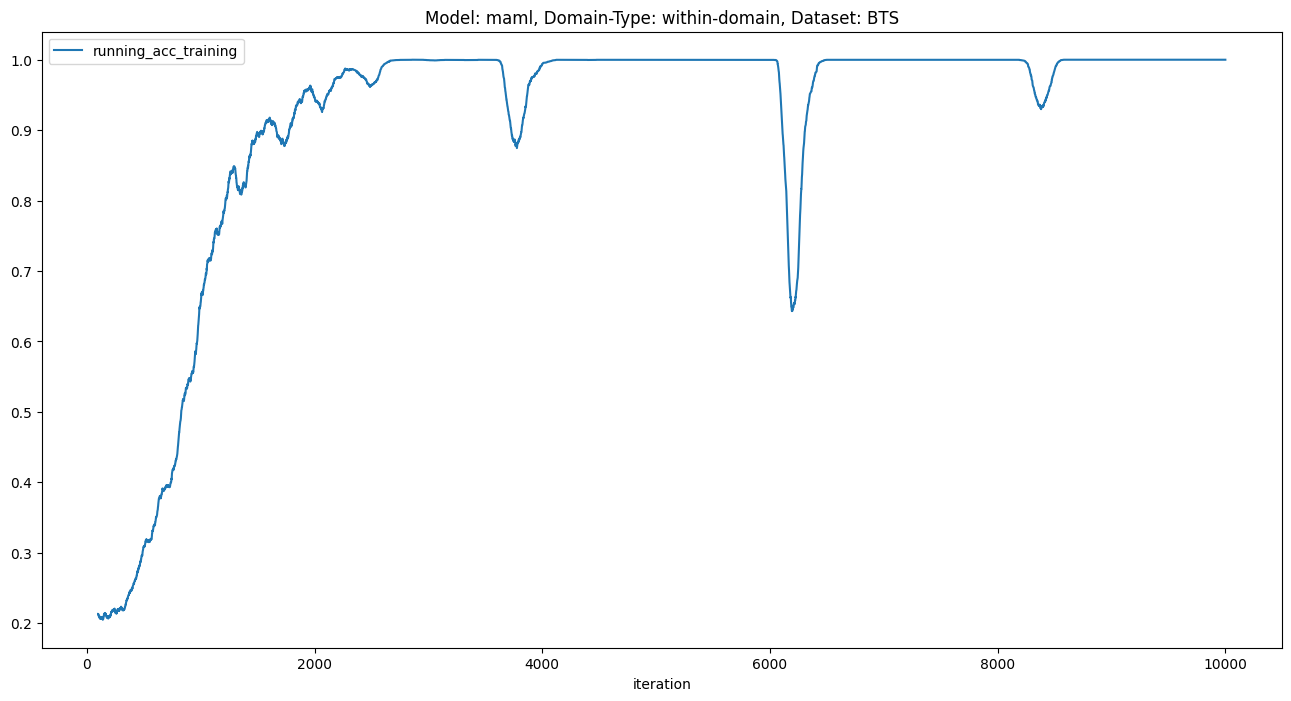

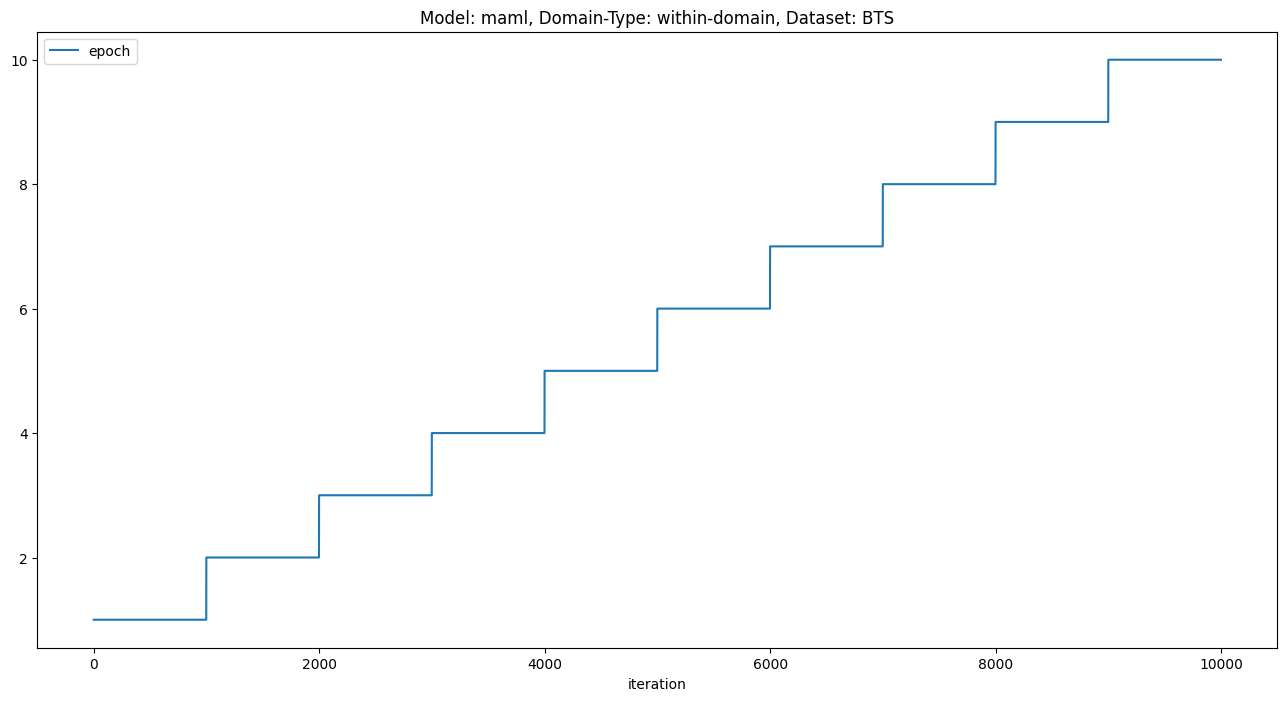

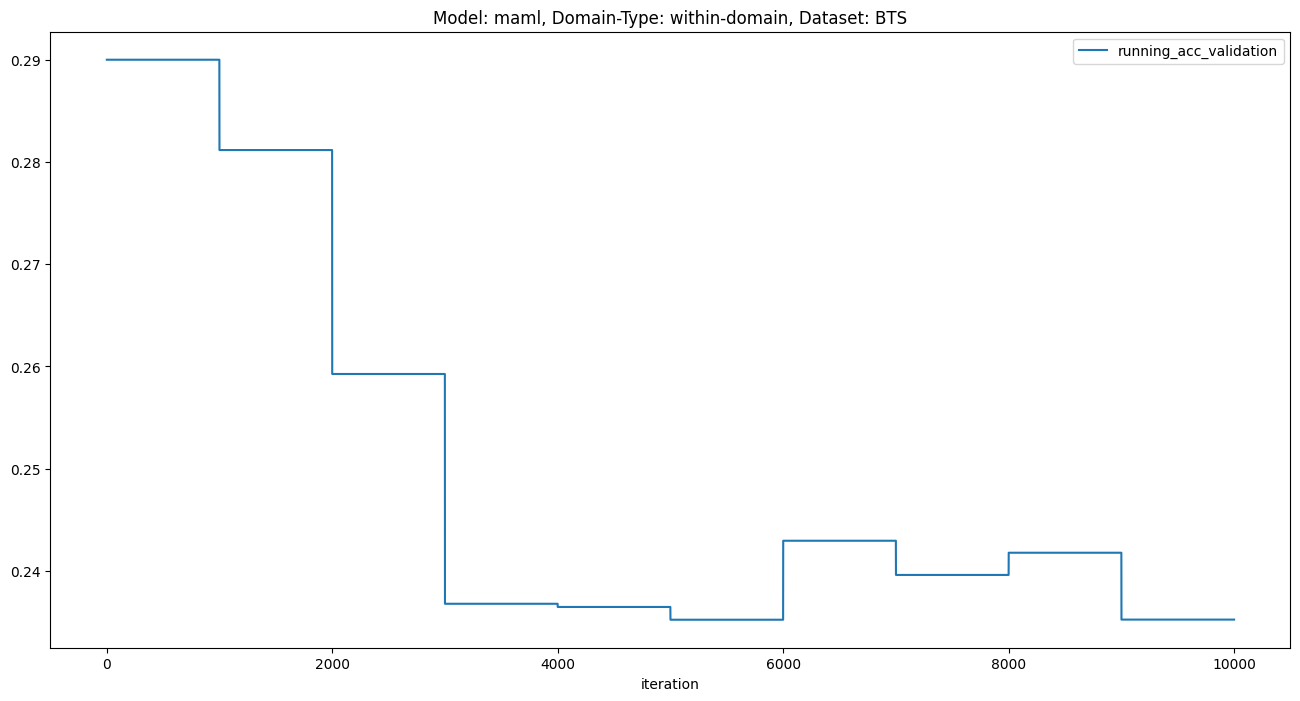

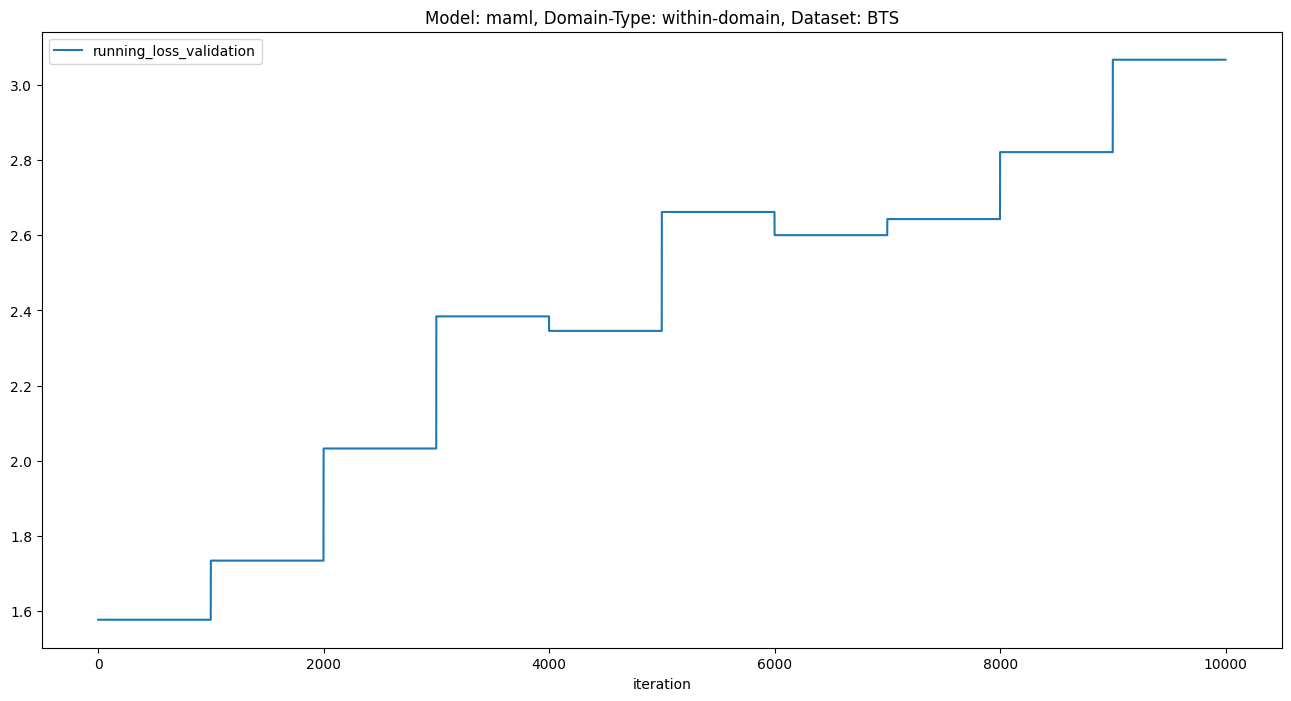

In [21]:
for type in ["loss", "acc"] + list(epochs_df.columns): 
    epochs_df[[col for col in epochs_df.columns if type in col]].plot(figsize=(16, 8), title=info_str)